In [1]:
import matplotlib.pyplot as plt
from math import sqrt as raiz2
import numpy as np

### 1. Euclidean plane

Consider this 3 points on 2D space:  
$A=(4, 5)$  
$B=(-2, -4)$  
$C=(8, -1)$  

#### 1.1. Plot them using `matplotlib`  

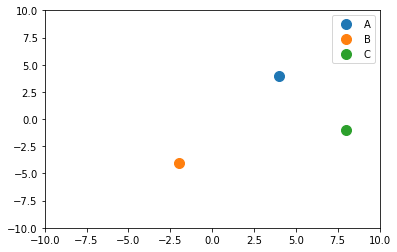

In [2]:
A = (4, 4)
B = (-2, -4)
C = (8, -1)

fig, ax = plt.subplots()

plt.plot(A[0], A[1], "o", markersize=10, label="A")
plt.plot(B[0], B[1], "o", markersize=10, label="B")
plt.plot(C[0], C[1], "o", markersize=10, label="C")

ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])

plt.legend()

#### 1.2. Which distance is longer, $AC, AB, \text{or} BC$? Write a function that calculates distance between two points.

In [3]:
def distancia(A,B):
    return raiz2((A[0]-B[0])**2+(A[1]-B[1])**2)

A = (4, 4)
B = (-2, -4)
C = (8, -1)
distancias = {"AC": distancia(A,C), "AB":distancia(A,B), "BC":distancia(B,C)}
min(distancias, key=distancias.get)

'AC'

#### 1.3. What is the perimeter of triangle $ABC$?

In [4]:
def perimetro_tr(A,B,C):
    return round((distancia(A,B) + distancia(B,C) + distancia(C,A)),2)
perimetro_tr(A,B,C)

26.84

### 2. Linear functions

Consider the following straight lines on 2D space:  
$y_1=2x-3$  
$y_2=-3x+12$  

#### 2.1. Plot them

In [5]:
x = np.linspace(
    start=-10, 
    stop=10, 
    num=300
)


In [14]:
y1 = 2*x - 3
y2= -3*x +12

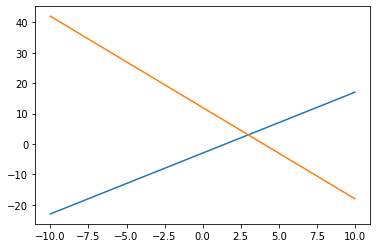

In [15]:
plt.plot(x, y1, "-")
plt.plot(x, y2, "-")


#### 2.2. What are the respective slopes

In [9]:

x=0
y0 = 2*x - 3
x=10
y10 = 2*x - 3
pendiente_y1=(y10-y0)/10


x=0
y0 =  -3*x +12
x=10
y10 =  -3*x +12
pendiente_y2=(y10-y0)/10

print("Pendiente y1: ", pendiente_y1)
print("Pendiente y2: ", pendiente_y2)

Pendiente y1:  2.0
Pendiente y2:  -3.0


#### 2.3. Give 3 points through which $y_1$ goes through

In [10]:
x=[x for x in range(1,4,1)]
y=[2*x - 3 for x in range(1,4,1)]
print("Puntos de la recta:")
print(list(zip(x,y)))


Puntos de la recta:
[(1, -1), (2, 1), (3, 3)]


#### 2.4. Where do they intersect?

In [27]:
x=[x for x in range(1,4,1)]
y1=[2*x - 3 for x in range(1,4,1)]
y2=[-3*x +12 for x in range(1,4,1)]
pares=zip(x,y1,y2)
for x,y1,y2 in pares:
    if y1 == y2:
        print("x=",x,"y=",y1)

x= 3 y= 3


#### 2.5. BONUS 

My yearly salary has increased **linearly** with my age:  
When I was 21 years old, I did 10000\\$ / year    
Today I am 39 years old, I am doing 33400\\$ / year  
How much will I do when I get 50 years old?

In [28]:

m=(33400-10000)/(39-21)
n=10000-m*21
x=50
round(m*x+n)

47700

### 3. Polynomials

Consider these different degree polynomials:  
$y_2=x^2-3x-10$  
$y_3=x^3-2x^2+5x+1$  
$y_4=x^4-x^3+x^2-x+1$  

#### 3.1. Plot them

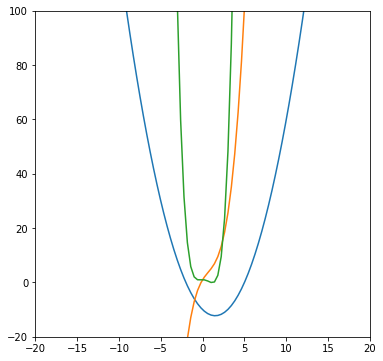

In [29]:
fig, ax = plt.subplots(figsize=(6, 6))
"""
ticks = np.arange(-10, 100, 0.1)


ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.grid(True, which='both')

ax.set_aspect('equal')
"""
ax.set_xlim([-20, 20])
ax.set_ylim([-20, 100])
x = np.linspace(start=-20, stop=20, num=100)
y2 = x**2 - 3*x -10
y3 = x**3 - 2*x**2 + 5*x +1
y4 = x**4 - x**3 - x**2 +1


plt.plot(x, y2, "-")
plt.plot(x, y3, "-")
plt.plot(x, y4, "-")

#### 3.2. Which one takes a bigger value on $x=0$? On $x=2$? On $x=100$?

In [30]:
x=0
y2 = x**2 - 3*x -10
y3 = x**3 - 2*x**2 + 5*x +1
y4 = x**4 - x**3 - x**2 +1
nombres=['y2','y3','y4']
valores=[y2, y3, y4]
max_valor = max(valores)
indices = [print("La función con mayor valor en x=",x," es ",nombres[i]) for i, x in enumerate(valores) if x == max_valor]



La función con mayor valor en x= 1  es  y3
La función con mayor valor en x= 1  es  y4


In [31]:
x=2
y2 = x**2 - 3*x -10
y3 = x**3 - 2*x**2 + 5*x +1
y4 = x**4 - x**3 - x**2 +1
nombres=['y2','y3','y4']
valores=[y2, y3, y4]
max_valor = max(valores)
indices = [print("La función con mayor valor en x=",x," es ",nombres[i]) for i, x in enumerate(valores) if x == max_valor]



La función con mayor valor en x= 11  es  y3


In [32]:
x=100
y2 = x**2 - 3*x -10
y3 = x**3 - 2*x**2 + 5*x +1
y4 = x**4 - x**3 - x**2 +1
nombres=['y2','y3','y4']
valores=[y2, y3, y4]
max_valor = max(valores)
indices = [print("La función con mayor valor en x=",x," es ",nombres[i]) for i, x in enumerate(valores) if x == max_valor]



La función con mayor valor en x= 98990001  es  y4


#### 3.3. Who is the vertex of parabola $y_2$?

In [33]:
y= x**2 - 3*x -10
#vertex
# 0=2*x-3
x=3/2
print("El vertex está en x=",x," y=",y)

El vertex está en x= 1.5  y= 9690


#### 3.4. Where does $y_2$ intersect X axis? And Y axis?

In [34]:


import math
y= x**2 - 3*x -10
#0= x**2 - 3*x -10
a=1
b=-3
c=-10
x1=(-b+math.sqrt(b**2-4*a*c))/(2*a)
x2=(-b+math.sqrt(b**2-4*a*c))/(2*a)
print("La parábola x**2 - 3*x -10 corta el eje equis en x1=",x1," x2=",x2 )

La parábola x**2 - 3*x -10 corta el eje equis en x1= 5.0  x2= 5.0


In [35]:
y= x**2 - 3*x -10
#0= x**2 - 3*x -10
x=0
print("La parábola x**2 - 3*x -10 corta el eje y en y=",y )

La parábola x**2 - 3*x -10 corta el eje y en y= -12.25


#### 3.5. As x gets very big, what happens to $y$ go in each case?

In [36]:
x = float('inf')

y= x**2 - 3*x -10

print("'y' tiende a infinito cuando x tiende a +infiito")

'y' tiende a infinito cuando x tiende a +infiito


In [44]:
x = 99999999999

y= x**2 - 3*x -10
y

9999999999499999999994

#### 3.6. As x gets very small (big negative), what happens to $y$ go in each case?

In [37]:
x = float('inf')
xn=-x
y2= xn**2 + 3*xn -10

print("'y2' tiende a infinito cuando xn tiende a infiito, luego y tienede a +infinito")

'y2' tiende a infinito cuando xn tiende a infiito, luego y tienede a +infinito


In [45]:
x = -99999999999

y= x**2 - 3*x -10
y

10000000000099999999988

### 4. Exponential

#### 4.1. Print number $e$ rounded to 3 decimal figures

In [46]:
import math
exponent = 1
print( "El valor de 'e' es: ", round(math.exp(exponent),3))

El valor de 'e' es:  2.718


#### 4.2. Compute $e$ to the powers 0, 1, 2, 3, 10

In [47]:
exponente =range(0,4)
e_elev=[(exp,round(math.exp(exp),3)) for exp in exponente]
e_elev


[(0, 1.0), (1, 2.718), (2, 7.389), (3, 20.086)]

#### 4.3. Compute $e$ to the powers 0, -1, -2, -3, -10

In [48]:
exponente =range(0,-4,-1)
e_elev=[(exp,round(math.exp(exp),3)) for exp in exponente]
e_elev

[(0, 1.0), (-1, 0.368), (-2, 0.135), (-3, 0.05)]

#### 4.4. Plot functions $e^x$, $e^{2x}$, $e^{-x}$

Note: choose an appropiate x-range to visualize them all toguether

### 5. Sum notation

Find the following:

$$\sum_{n=4}^7 n$$

In [49]:

sum([n for n in range(4,8) ])

22

$$\sum_{n=-2}^3 (n + 1)$$

In [50]:
sum([n+1 for n in range(-2,4) ])

9

$$\sum_{n=-2}^3 (n^2 - 2)$$

In [51]:
sum([n**2-2 for n in range(-2,3) ])

0

$$\sum_{n=0}^4 (10^n - 1)$$

In [52]:
sum([10**n -1 for n in range(0,5) ])

11106

### 6. Combinatorics

#### 6.1. Ten people go to a party. How many handshakes happen?

In [53]:
def factorial(n):
    if n==0:
        return 1
    else:
        return n*factorial(n-1)
    
def combi(n,k):
    return(factorial(n)/(factorial(k)*factorial(n-k)))

apretones=combi(10,2)
print("Apretones totales: ",round(apretones))

Apretones totales:  45


#### 6.2. My family is composed of 11 members. By christmas, one buys food, one cooks and one cleans. How many possible arrangements of buyer-cooker-cleaner are there?

In [54]:
def permu(n,k):
    return factorial(n)/factorial(n-k)
           
opciones_navidad=permu(11,3)
print("Opciones totales: ",round(opciones_navidad))

Opciones totales:  990


### BONUS

11 and 13 are twin primes, since:
 - they are both primes  
 - their distance is 2
 
Find all pairs of twin primes below 1000

In [55]:
from math import sqrt
from math import floor
from functools import reduce
#calcula los primeros n primos usando el método de erastófenes

def sacar_primero_no_marcado(lista,num):
    l=lista[num:]
    
    for i,elemento in enumerate(lista):
        if not elemento:
            return i+num
    return i

def tachar_multiplos(lista,num):
    ultimo = len(lista) - 1
    i = 2
    multiplo = num * i
    
    while multiplo <= ultimo:
        lista[multiplo] = False
        i += 1
        multiplo = num * i        
    return lista

def crear_lista(num):
    return [False if i<2 else True for i in range(0,num+1) ]
  
    

def erastofenes(num):
    lista = crear_lista(num)
    
    primero_no_marca = sacar_primero_no_marcado(lista,2)
    cuadrado = primero_no_marca ** 2
    ultimo = len(lista) - 1
    
    while cuadrado <= ultimo:
        tachar_multiplos(lista,primero_no_marca)
        primero_no_marca = sacar_primero_no_marcado(lista,primero_no_marca+1)
        cuadrado = primero_no_marca ** 2    
        
    primos = [x  for x in range(len(lista)-1) if lista[x]]
    return primos



def es_primo(num):
    raiz_cuadrada_con_decimales = sqrt(num)           #no encontraba la raiz exacta y el radicando
    raiz_cuadrada = floor(raiz_cuadrada_con_decimales)

    if raiz_cuadrada == raiz_cuadrada_con_decimales:
        return False
    
    else:
        primos = erastofenes(raiz_cuadrada)
        
        for num_primo in primos:
            if num % num_primo == 0:
                return False
        return True

    
primos=erastofenes(100000)                 
primos_mas_dos=list(map(lambda x: x+ 2,primos))
gemelos=[(x-2 , x) for x in primos_mas_dos if x in primos]
print(gemelos)

[(3, 5), (5, 7), (11, 13), (17, 19), (29, 31), (41, 43), (59, 61), (71, 73), (101, 103), (107, 109), (137, 139), (149, 151), (179, 181), (191, 193), (197, 199), (227, 229), (239, 241), (269, 271), (281, 283), (311, 313), (347, 349), (419, 421), (431, 433), (461, 463), (521, 523), (569, 571), (599, 601), (617, 619), (641, 643), (659, 661), (809, 811), (821, 823), (827, 829), (857, 859), (881, 883), (1019, 1021), (1031, 1033), (1049, 1051), (1061, 1063), (1091, 1093), (1151, 1153), (1229, 1231), (1277, 1279), (1289, 1291), (1301, 1303), (1319, 1321), (1427, 1429), (1451, 1453), (1481, 1483), (1487, 1489), (1607, 1609), (1619, 1621), (1667, 1669), (1697, 1699), (1721, 1723), (1787, 1789), (1871, 1873), (1877, 1879), (1931, 1933), (1949, 1951), (1997, 1999), (2027, 2029), (2081, 2083), (2087, 2089), (2111, 2113), (2129, 2131), (2141, 2143), (2237, 2239), (2267, 2269), (2309, 2311), (2339, 2341), (2381, 2383), (2549, 2551), (2591, 2593), (2657, 2659), (2687, 2689), (2711, 2713), (2729, 2731